In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến

    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """

    pop = np.random.randint(2, size=(num_individuals, num_variables))


    return pop

In [3]:
# np.random.seed(42)
pop = initialize_population(8,4)
print(pop)

[[0 0 1 1]
 [0 1 0 1]
 [0 0 0 0]
 [1 1 0 1]
 [0 1 1 0]
 [1 0 0 0]
 [1 1 1 0]
 [0 0 1 1]]


In [4]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """

    value = np.sum(ind)

    return value

In [5]:
onemax(pop[5,:])

1

In [6]:
def truncation_selection(pop, pop_fitness, selection_size):
    selected_indices = np.argsort(pop_fitness)[-selection_size:]
    return selected_indices

In [7]:
def crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.

    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """

    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])

        # Cài đặt phép lai đồng nhất uniform crossover.
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx]
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)

    offspring = np.array(offspring)
    return offspring

In [8]:
def mutation(pop, mutation_prob):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    for i in range(0, num_individuals):
        for j in range(0, num_parameters):
            r = np.random.rand()
            if r < mutation_prob:
                if pop[i][j] == 0:
                    pop[i][j] = 1
                else:
                    pop[i][j] = 0

    return pop

In [9]:
def genetic_algorithm(objective, num_individuals, num_parameters, max_evaluations, verbose=False):
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([objective(ind) for ind in pop])
    num_evaluations = num_individuals
    best_fitness = []
    if verbose:
        print("#Gen 0:")
        print(pop_fitness)

    selection_size = num_individuals // 2

    while num_evaluations < max_evaluations:
        best_fitness.append([num_evaluations, np.max(pop_fitness)])
        selected_indices = truncation_selection( pop, pop_fitness, selection_size )
        selection_set = pop[selected_indices]
        selection_fitness = pop_fitness[selected_indices]

        offspring = crossover(selection_set)
        offspring = mutation(offspring, 0.1)
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        num_evaluations += len(offspring)

        pop = np.vstack([selection_set, offspring])
        pop_fitness = np.concatenate((selection_fitness, offspring_fitness))

        if verbose:
            print(f'#Gen {i+1}:')
            print(pop_fitness)

    best_fitness.append([num_evaluations, np.max(pop_fitness)])
    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    return (pop, pop_fitness, best_fitness)


In [10]:
np.random.seed(42)
num_parameters = 100
num_individuals = 128
max_evaluations = 2**15
pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)

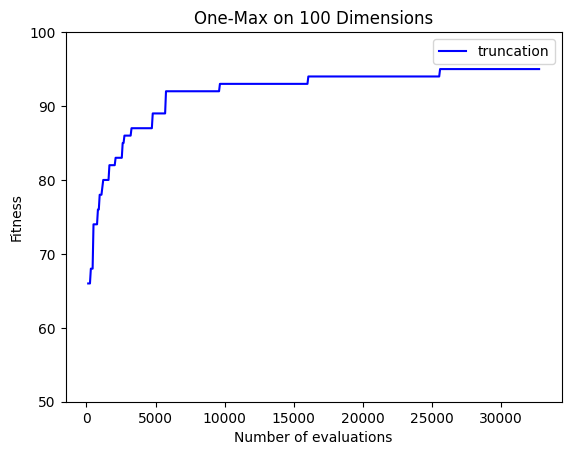

In [11]:
best_fitness = np.array(best_fitness)
plt.plot(best_fitness[:,0], best_fitness[:,1], label='truncation', color='b')
plt.xlabel("Number of evaluations")
plt.ylabel("Fitness")
plt.ylim(num_parameters/2, num_parameters)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();

In [12]:
n_trials = 10
num_parameters = 50
max_evaluations = 2000
num_individuals = 20 # population size

fits_truncation = []
evals = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm(onemax, num_individuals, num_parameters, max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals = best_fitness[:,0]
    fits_truncation.append(best_fitness[:,1])

In [13]:
fits_truncation = np.array(fits_truncation)

In [14]:
fits_truncation

array([[33, 35, 35, ..., 50, 50, 50],
       [31, 31, 31, ..., 49, 49, 49],
       [32, 32, 32, ..., 50, 50, 50],
       ...,
       [28, 29, 32, ..., 50, 50, 50],
       [30, 33, 34, ..., 49, 49, 49],
       [34, 34, 36, ..., 50, 50, 50]])

In [15]:
avg = np.mean(fits_truncation, axis=0)
err = np.std(fits_truncation, axis=0)
avg

array([31.6, 32.3, 32.9, 34.1, 35.6, 36.4, 37.3, 37.6, 37.8, 38.8, 39.3,
       39.7, 40.6, 40.7, 41.2, 41.3, 41.7, 41.8, 41.8, 42. , 42. , 42.4,
       42.8, 42.9, 43.3, 43.5, 43.9, 44.1, 44.2, 44.4, 44.6, 44.8, 44.8,
       44.8, 44.9, 44.9, 45.2, 45.3, 45.4, 45.4, 45.4, 45.5, 45.6, 45.7,
       45.9, 46. , 46.1, 46.3, 46.3, 46.3, 46.4, 46.4, 46.6, 46.6, 46.6,
       46.6, 46.8, 46.8, 46.9, 46.9, 46.9, 47.2, 47.2, 47.2, 47.3, 47.3,
       47.6, 47.9, 47.9, 47.9, 47.9, 47.9, 48. , 48.1, 48.1, 48.1, 48.1,
       48.1, 48.1, 48.1, 48.1, 48.1, 48.1, 48.1, 48.1, 48.1, 48.2, 48.2,
       48.2, 48.2, 48.2, 48.2, 48.2, 48.3, 48.3, 48.4, 48.4, 48.4, 48.4,
       48.4, 48.4, 48.4, 48.4, 48.4, 48.4, 48.4, 48.5, 48.5, 48.5, 48.5,
       48.5, 48.5, 48.6, 48.6, 48.6, 48.6, 48.6, 48.6, 48.6, 48.6, 48.6,
       48.6, 48.6, 48.6, 48.6, 48.6, 48.6, 48.6, 48.6, 48.6, 48.6, 48.6,
       48.6, 48.6, 48.6, 48.7, 48.7, 48.7, 48.8, 48.8, 48.8, 48.8, 48.8,
       48.8, 48.8, 48.8, 48.8, 48.8, 48.8, 48.8, 48

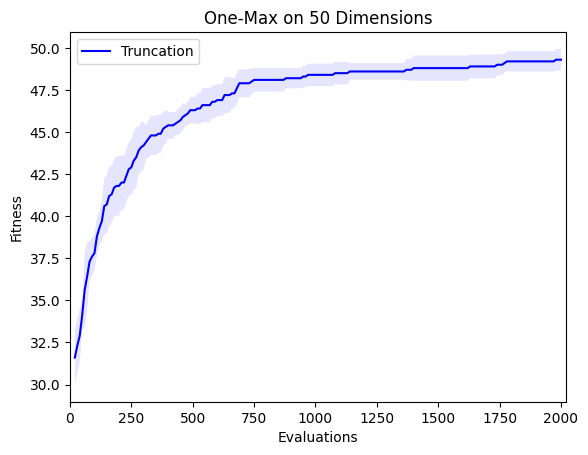

In [16]:
plt.plot(evals, avg, label="Truncation", color='b')
plt.fill_between(evals, avg+err, avg-err, facecolor='b', alpha=0.1)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();

# Assignment

## Define crossover 1x

In [17]:
def crossover1x(pop):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    offspring = []

    for i in range(0, num_individuals, 2):
        parent1 = pop[i]
        parent2 = pop[i+1]

        # Chọn một điểm cắt ngẫu nhiên trên chuỗi gen
        crossover_point = np.random.randint(1, num_parameters)

        # Tạo cá thể con thứ nhất bằng cách kết hợp gen của cha và mẹ
        offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        
        # Tạo cá thể con thứ hai bằng cách kết hợp gen của mẹ và cha
        offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))

        offspring.append(offspring1)
        offspring.append(offspring2)

    return np.array(offspring)

In [18]:
# test cross over1x
test_pop = initialize_population(2,8)
test_pop

array([[0, 1, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 0]])

In [19]:
test_pop_1x = crossover1x(test_pop)
test_pop_1x

array([[0, 1, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 1, 0]])

## Define Leading One

In [20]:
def leading_ones(ind):
    f = 0
    for i in range(len(ind)):
        if not ind[i]:
            f = i
            break
    return f

In [21]:
# test leading ones
test_leading_ones = leading_ones(test_pop_1x[0])
test_leading_ones

0

## Define Proportional selection

In [22]:

def proportional_selection(pop, pop_fitness, selection_size):
    total_fitness = sum(pop_fitness)
    cumulative_probabilities = np.cumsum(pop_fitness / total_fitness)
    selected_indices = []
    for _ in range(selection_size):
        random_number = np.random.rand()
        selected_index = np.searchsorted(cumulative_probabilities, random_number)
        selected_indices.append(selected_index)

    return selected_indices

## Define Tournament selection

In [23]:
def tournament_selection(pop, pop_fitness, selection_size, tournament_size=4):
    selected_indices = []

    for _ in range(selection_size):
        # Chọn ngẫu nhiên tournament_size cá thể vào bảng đấu
        tournament_indices = np.random.choice(len(pop), size=tournament_size, replace=False)

        # Tìm cá thể có fitness tốt nhất trong bảng đấu
        best_index = tournament_indices[np.argmax(pop_fitness[tournament_indices])]

        # Thêm chỉ mục của cá thể chiến thắng vào danh sách được chọn
        selected_indices.append(best_index)

    return selected_indices

## Define GA Standard

In [24]:
def genetic_algorithm_standard(objective, crossover_fn, num_individuals, num_parameters, max_evaluations, verbose=False):
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([objective(ind) for ind in pop])
    num_evaluations = num_individuals
    best_fitness = []
    if verbose:
        print("#Gen 0:")
        print(pop_fitness)

    selection_size = num_individuals 

    while num_evaluations < max_evaluations:
        best_fitness.append([num_evaluations, np.max(pop_fitness)])
        selected_indices = proportional_selection( pop, pop_fitness, selection_size )
        selection_set = pop[selected_indices]

        offspring = crossover_fn(selection_set)
        offspring = mutation(offspring, 0.1)
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        num_evaluations += len(offspring)

        pop = offspring
        pop_fitness = offspring_fitness

        if verbose:
            print(f'#Gen {i+1}:')
            print(pop_fitness)

    best_fitness.append([num_evaluations, np.max(pop_fitness)])
    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    return (pop, pop_fitness, best_fitness)
    

## Define GA POPOP 

In [25]:
def genetic_algorithm_POPOP(objective, crossover_fn, num_individuals, num_parameters, max_evaluations, verbose=False):
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([objective(ind) for ind in pop])
    num_evaluations = num_individuals
    best_fitness = []
    if verbose:
        print("#Gen 0:")
        print(pop_fitness)

    selection_size = num_individuals // 2

    while num_evaluations < max_evaluations:
        best_fitness.append([num_evaluations, np.max(pop_fitness)])
        # lai ghép để tạo cá thể con mới từ quần thể hiện tại 
        offspring = crossover_fn(pop)
        offspring = mutation(offspring, 0.1)
        offspring_fitness = np.array([objective(ind) for ind in offspring])
        num_evaluations += len(offspring)

        # trộn cha mẹ và con cái (P+O)
        pop = np.vstack([pop, offspring])
        pop_fitness = np.concatenate((pop_fitness, offspring_fitness))

        # chọn lọc giao đấu 
        selected_indices = tournament_selection(pop, pop_fitness, selection_size)
        pop = pop[selected_indices]
        pop_fitness = pop_fitness[selected_indices]

        if verbose:
            print(f'#Gen {i+1}:')
            print(pop_fitness)

    best_fitness.append([num_evaluations, np.max(pop_fitness)])
    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    return (pop, pop_fitness, best_fitness)

In [26]:
def plot_helper(label, color, fits, evals):
    avg = np.mean(fits, axis=0)
    err = np.std(fits, axis=0) 
    plt.plot(evals, avg, label=label, color=color)
    plt.fill_between(evals, avg+err, avg-err, facecolor=color, alpha=0.1)

## One Max

### 50 bit

In [27]:
n_trials = 10
num_parameters = 50
max_evaluations = 50000
num_individuals = 16 # population size

# ga standard ux
fits_ga_ux = []
evals_ga_ux = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_standard(
        onemax, 
        crossover,
        num_individuals, 
        num_parameters, 
        max_evaluations,
        )
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_ux = best_fitness[:,0]
    fits_ga_ux.append(best_fitness[:,1])


# ga standard 1x
fits_ga_1x = []
evals_ga_1x = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_standard(
        onemax, 
        crossover1x,
        num_individuals, 
        num_parameters, 
        max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_1x = best_fitness[:,0]
    fits_ga_1x.append(best_fitness[:,1])

# ga popop ux
fits_ga_popop_ux = []
evals_ga_popop_ux = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_POPOP(
        onemax, 
        crossover,
        num_individuals, 
        num_parameters, 
        max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_popop_ux = best_fitness[:,0]
    fits_ga_popop_ux.append(best_fitness[:,1])

# ga popop 1x
fits_ga_popop_1x = []
evals_ga_popop_1x = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_POPOP(
        onemax, 
        crossover1x,
        num_individuals, 
        num_parameters, 
        max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_popop_1x = best_fitness[:,0]
    fits_ga_popop_1x.append(best_fitness[:,1])

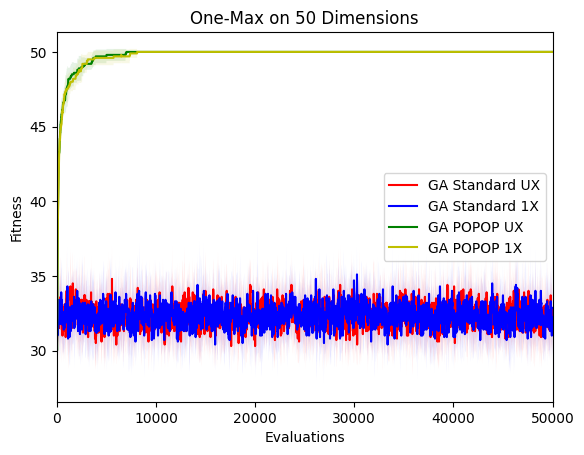

In [28]:
# plot
plot_helper("GA Standard UX", "r", fits_ga_ux, evals_ga_ux)
plot_helper("GA Standard 1X", "b", fits_ga_1x, evals_ga_1x)
plot_helper("GA POPOP UX", "g", fits_ga_popop_ux, evals_ga_popop_ux)
plot_helper("GA POPOP 1X", "y", fits_ga_popop_1x, evals_ga_popop_1x)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();

### 100 bits

In [29]:
n_trials = 10
num_parameters = 100 
max_evaluations = 100000 
num_individuals = 64 # population size

# ga standard ux
fits_ga_ux = []
evals_ga_ux = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_standard(
        onemax, 
        crossover,
        num_individuals, 
        num_parameters, 
        max_evaluations,
        )
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_ux = best_fitness[:,0]
    fits_ga_ux.append(best_fitness[:,1])


# ga standard 1x
fits_ga_1x = []
evals_ga_1x = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_standard(
        onemax, 
        crossover1x,
        num_individuals, 
        num_parameters, 
        max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_1x = best_fitness[:,0]
    fits_ga_1x.append(best_fitness[:,1])

# ga popop ux
fits_ga_popop_ux = []
evals_ga_popop_ux = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_POPOP(
        onemax, 
        crossover,
        num_individuals, 
        num_parameters, 
        max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_popop_ux = best_fitness[:,0]
    fits_ga_popop_ux.append(best_fitness[:,1])

# ga popop 1x
fits_ga_popop_1x = []
evals_ga_popop_1x = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_POPOP(
        onemax, 
        crossover1x,
        num_individuals, 
        num_parameters, 
        max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_popop_1x = best_fitness[:,0]
    fits_ga_popop_1x.append(best_fitness[:,1])

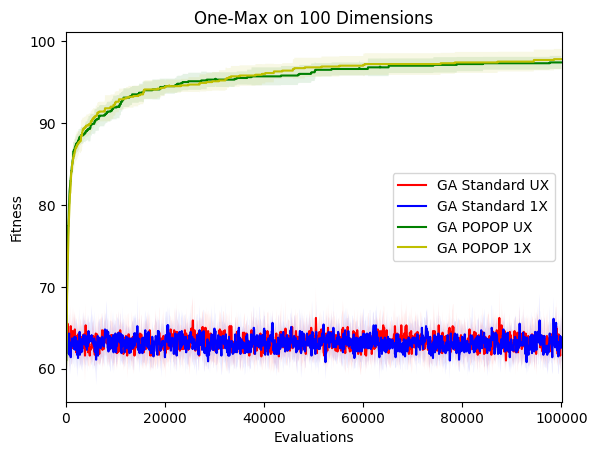

In [30]:
# plot
plot_helper("GA Standard UX", "r", fits_ga_ux, evals_ga_ux)
plot_helper("GA Standard 1X", "b", fits_ga_1x, evals_ga_1x)
plot_helper("GA POPOP UX", "g", fits_ga_popop_ux, evals_ga_popop_ux)
plot_helper("GA POPOP 1X", "y", fits_ga_popop_1x, evals_ga_popop_1x)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"One-Max on {num_parameters} Dimensions")
plt.legend();

## Leading one 

### 10 bits

In [31]:
n_trials = 10
num_parameters = 10 
max_evaluations = 50000
num_individuals = 16 # population size

# ga standard ux
fits_ga_ux = []
evals_ga_ux = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_standard(
        leading_ones, 
        crossover,
        num_individuals, 
        num_parameters, 
        max_evaluations,
        )
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_ux = best_fitness[:,0]
    fits_ga_ux.append(best_fitness[:,1])


# ga standard 1x
fits_ga_1x = []
evals_ga_1x = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_standard(
        leading_ones, 
        crossover1x,
        num_individuals, 
        num_parameters, 
        max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_1x = best_fitness[:,0]
    fits_ga_1x.append(best_fitness[:,1])

# ga popop ux
fits_ga_popop_ux = []
evals_ga_popop_ux = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_POPOP(
        leading_ones, 
        crossover,
        num_individuals, 
        num_parameters, 
        max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_popop_ux = best_fitness[:,0]
    fits_ga_popop_ux.append(best_fitness[:,1])

# ga popop 1x
fits_ga_popop_1x = []
evals_ga_popop_1x = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_POPOP(
        leading_ones, 
        crossover1x,
        num_individuals, 
        num_parameters, 
        max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_popop_1x = best_fitness[:,0]
    fits_ga_popop_1x.append(best_fitness[:,1])

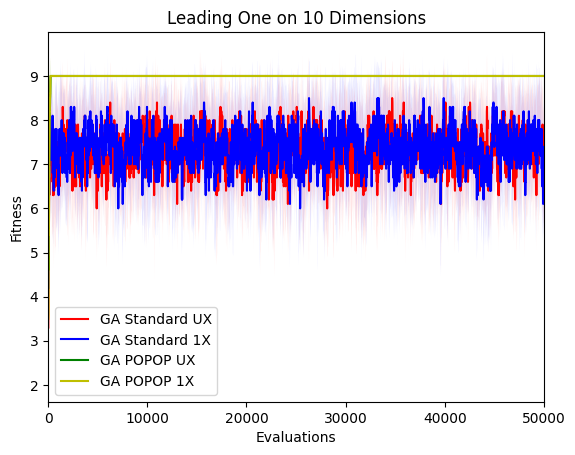

In [32]:
# plot
plot_helper("GA Standard UX", "r", fits_ga_ux, evals_ga_ux)
plot_helper("GA Standard 1X", "b", fits_ga_1x, evals_ga_1x)
plot_helper("GA POPOP UX", "g", fits_ga_popop_ux, evals_ga_popop_ux)
plot_helper("GA POPOP 1X", "y", fits_ga_popop_1x, evals_ga_popop_1x)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"Leading One on {num_parameters} Dimensions")
plt.legend();

### 20 bits


In [33]:
n_trials = 10
num_parameters = 20 
max_evaluations = 100000 
num_individuals = 64 # population size

# ga standard ux
fits_ga_ux = []
evals_ga_ux = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_standard(
        leading_ones, 
        crossover,
        num_individuals, 
        num_parameters, 
        max_evaluations,
        )
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_ux = best_fitness[:,0]
    fits_ga_ux.append(best_fitness[:,1])


# ga standard 1x
fits_ga_1x = []
evals_ga_1x = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_standard(
        leading_ones, 
        crossover1x,
        num_individuals, 
        num_parameters, 
        max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_1x = best_fitness[:,0]
    fits_ga_1x.append(best_fitness[:,1])

# ga popop ux
fits_ga_popop_ux = []
evals_ga_popop_ux = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_POPOP(
        leading_ones, 
        crossover,
        num_individuals, 
        num_parameters, 
        max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_popop_ux = best_fitness[:,0]
    fits_ga_popop_ux.append(best_fitness[:,1])

# ga popop 1x
fits_ga_popop_1x = []
evals_ga_popop_1x = []
for i in range(n_trials):
    pop, pop_fitness, best_fitness = genetic_algorithm_POPOP(
        leading_ones, 
        crossover1x,
        num_individuals, 
        num_parameters, 
        max_evaluations)
    best_fitness = np.array(best_fitness)
    if i == 0:
        evals_ga_popop_1x = best_fitness[:,0]
    fits_ga_popop_1x.append(best_fitness[:,1])

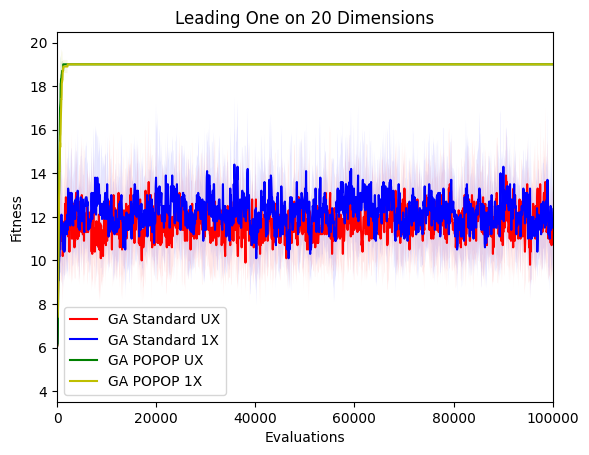

In [34]:
# plot
plot_helper("GA Standard UX", "r", fits_ga_ux, evals_ga_ux)
plot_helper("GA Standard 1X", "b", fits_ga_1x, evals_ga_1x)
plot_helper("GA POPOP UX", "g", fits_ga_popop_ux, evals_ga_popop_ux)
plot_helper("GA POPOP 1X", "y", fits_ga_popop_1x, evals_ga_popop_1x)

plt.xlabel("Evaluations")
plt.ylabel("Fitness")
plt.xlim(0, max_evaluations+num_individuals)
plt.title(f"Leading One on {num_parameters} Dimensions")
plt.legend();

# Conclusions

Base on the results, we can draw some conclusions:
- In both problems, POPOP GA have better results.
- 1X and UX have the same fit for both problems